<a href="https://colab.research.google.com/github/keepon1/data_analysis/blob/master/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
warnings.filterwarnings('ignore')

In [21]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [22]:
data1 = list(pd.read_pickle('/data_batch_1').values())
data2 = list(pd.read_pickle('/data_batch_1').values())
data3 = list(pd.read_pickle('/data_batch_1').values())
data4 = list(pd.read_pickle('/data_batch_1').values())
data5 = list(pd.read_pickle('/data_batch_1').values())

In [23]:
y1 = data1[1]
x1 = data1[2]
y2 = data2[1]
x2 = data2[2]
y3 = data3[1]
x3 = data3[2]
y4 = data4[1]
x4 = data4[2]
y5 = data5[1]
x5 = data5[2]

In [24]:
y_data = []
x_data = []
for i,j in zip(x1,y1):
    r = i[:1024]
    g = i[1024:2048]
    b = i[2048:]
    red = r.reshape(32, 32)
    green = g.reshape(32, 32)
    blue = b.reshape(32, 32)
    image = np.dstack((red, green, blue))
    x_data.append(image)
    y_data.append(j)

for i,j in zip(x1,y1):
    r = i[:1024]
    g = i[1024:2048]
    b = i[2048:]
    red = r.reshape(32, 32)
    green = g.reshape(32, 32)
    blue = b.reshape(32, 32)
    image = np.dstack((red, green, blue))
    x_data.append(image)
    y_data.append(j)

for i,j in zip(x2,y2):
    r = i[:1024]
    g = i[1024:2048]
    b = i[2048:]
    red = r.reshape(32, 32)
    green = g.reshape(32, 32)
    blue = b.reshape(32, 32)
    image = np.dstack((red, green, blue))
    x_data.append(image)
    y_data.append(j)

for i,j in zip(x3,y3):
    r = i[:1024]
    g = i[1024:2048]
    b = i[2048:]
    red = r.reshape(32, 32)
    green = g.reshape(32, 32)
    blue = b.reshape(32, 32)
    image = np.dstack((red, green, blue))
    x_data.append(image)
    y_data.append(j)

for i,j in zip(x4,y4):
    r = i[:1024]
    g = i[1024:2048]
    b = i[2048:]
    red = r.reshape(32, 32)
    green = g.reshape(32, 32)
    blue = b.reshape(32, 32)
    image = np.dstack((red, green, blue))
    x_data.append(image)
    y_data.append(j)

for i,j in zip(x5,y5):
    r = i[:1024]
    g = i[1024:2048]
    b = i[2048:]
    red = r.reshape(32, 32)
    green = g.reshape(32, 32)
    blue = b.reshape(32, 32)
    image = np.dstack((red, green, blue))
    x_data.append(image)
    y_data.append(j)
x_data = np.array(x_data).astype(np.uint8)
y_data = np.array(y_data).astype(np.uint8)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2)

In [26]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [27]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (32,32,3)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [28]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
#optimizer = RMSprop(learning_rate=0.001, decay=1e-6)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [29]:
epochs = 40
batch_size = 300

In [30]:
datagen = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/40
112/112 [==============================] - 21s 169ms/step - loss: 1.8894 - accuracy: 0.3014 - val_loss: 1.5589 - val_accuracy: 0.4198
Epoch 2/40
112/112 [==============================] - 18s 157ms/step - loss: 1.5424 - accuracy: 0.4322 - val_loss: 1.3420 - val_accuracy: 0.5238
Epoch 3/40
112/112 [==============================] - 19s 167ms/step - loss: 1.3792 - accuracy: 0.5010 - val_loss: 1.2450 - val_accuracy: 0.5494
Epoch 4/40
112/112 [==============================] - 18s 162ms/step - loss: 1.2439 - accuracy: 0.5525 - val_loss: 1.1529 - val_accuracy: 0.5958
Epoch 5/40
112/112 [==============================] - 18s 161ms/step - loss: 1.1388 - accuracy: 0.5931 - val_loss: 0.9587 - val_accuracy: 0.6575
Epoch 6/40
112/112 [==============================] - 18s 161ms/step - loss: 1.0412 - accuracy: 0.6286 - val_loss: 0.8595 - val_accuracy: 0.6968
Epoch 7/40
112/112 [==============================] - 18s 156ms/step - loss: 0.9669 - accuracy: 0.6543 - val_loss: 0.7227 - val_ac

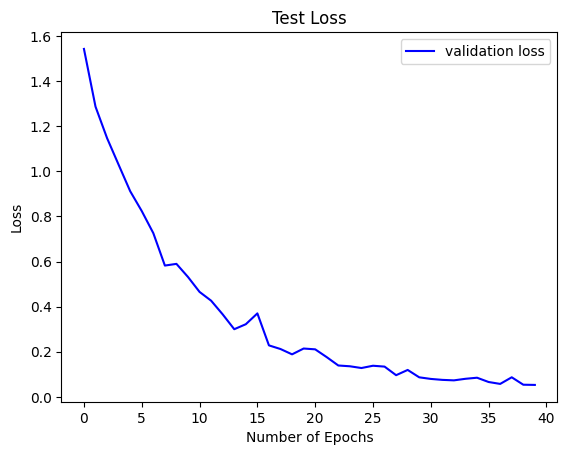

In [18]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# New Section

563/563 [==============================] - 2s 4ms/step


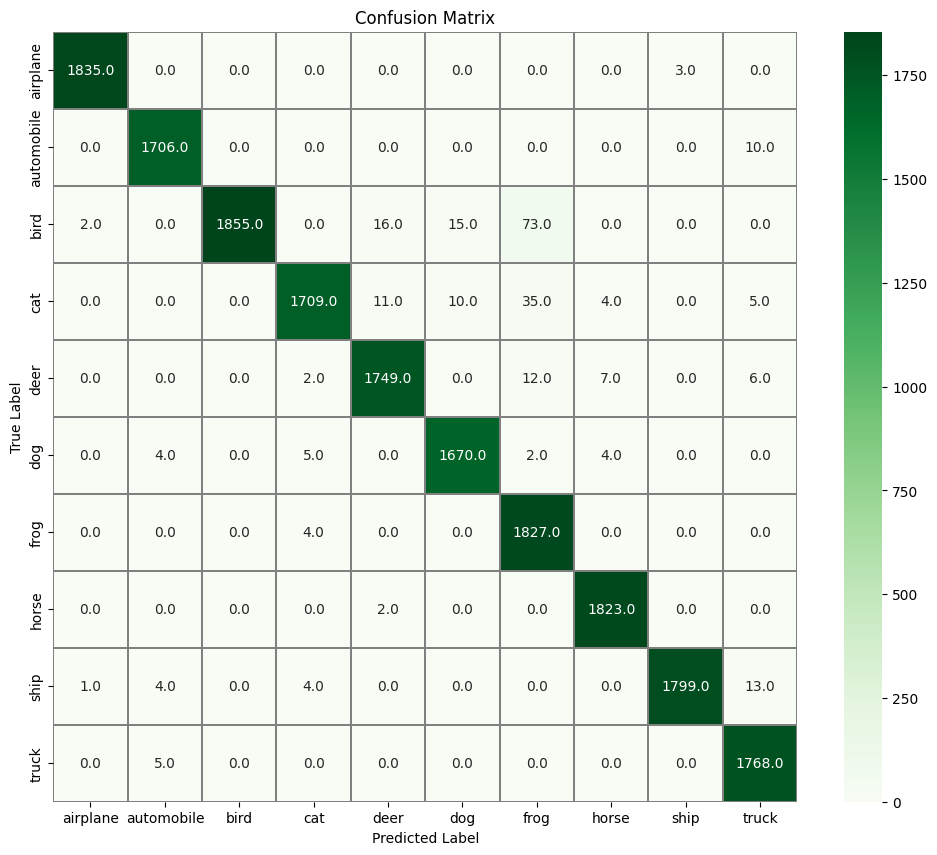

In [19]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
ax.xaxis.set_ticklabels(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
ax.yaxis.set_ticklabels(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
plt.show()